<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week5/Day2/Exercise_XP/Exercise_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
! pip install -k kaggle
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d shariful07/student-mental-health

In [ ]:
! unzip 'student-mental-health.zip'

In [88]:
df = pd.read_csv('Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100.0,20.53,2.49628,18.0,18.0,19.0,23.0,24.0


In [79]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [80]:
cdata = df.copy()

In [ ]:
cdata['Timestamp'] = pd.to_datetime(cdata['Timestamp'])

In [82]:
# Check for missing values
missing_values = cdata[cdata.isna().any(axis=1)]

# Display the rows where missing values exist
print(missing_values)

             Timestamp Choose your gender  Age What is your course?  \
43 2020-08-07 15:07:00               Male  NaN                  BIT   

   Your current year of Study What is your CGPA? Marital status  \
43                     year 1           0 - 1.99             No   

   Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
43                      No                   No                        No   

   Did you seek any specialist for a treatment?  
43                                           No  


In [83]:
study_year = cdata[cdata['Your current year of Study']== 'year 1']

In [123]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
# Fill missing values for the 'Age' column using KNNImputer
age_imputed = imputer.fit_transform(cdata[['Age']])

# Create a DataFrame with the imputed 'Age' column
cdata_imputed = pd.DataFrame(age_imputed, columns=['Age'])


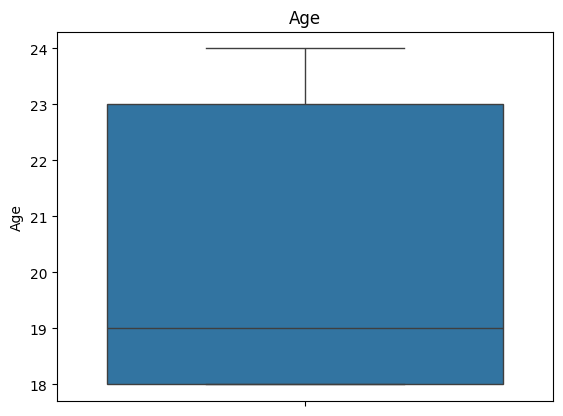

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of score through box plot, checking no outliers
sns.boxplot(data=cdata,y='Age')

plt.title('Age')
plt.show()

In [86]:
cdata.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [ ]:
cdata.columns = ['Timestamp', 'Gender', 'Age', 'Course',
       'Year of Study', 'CGPA', 'Marital status',
       'Depression', 'Anxiety',
       'Panic attack',
       'Treatment']
cdata

In [90]:
cdata['Year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [91]:
cdata['Year of Study'].replace({'year 1': 'year 1', 'year 2': 'year 2',
'Year 1': 'year 1', 'year 3': 'year 3', 'year 4': 'year 4', 'Year 2': 'year 2','Year 3': 'year 3'}
, inplace = True)

In [ ]:
cdata['CGPA'].unique()

In [ ]:
cdata['CGPA'] = cdata['CGPA'].str.strip()
cdata

In [ ]:
cdata['Course'].unique()

In [ ]:
cdata['Course'].replace({'Islamic education':'Islamic Education', 'Pendidikan islam': 'Pendidikan Islam',
                         'Law': 'Laws', 'Engine': 'Engineering', 'Benl': 'BENL','engin':'Engineering',
                         'psychology': 'Psychology', 'Koe': 'KOE' })

Exercise 1 : Visualizing The Distribution Of CGPA

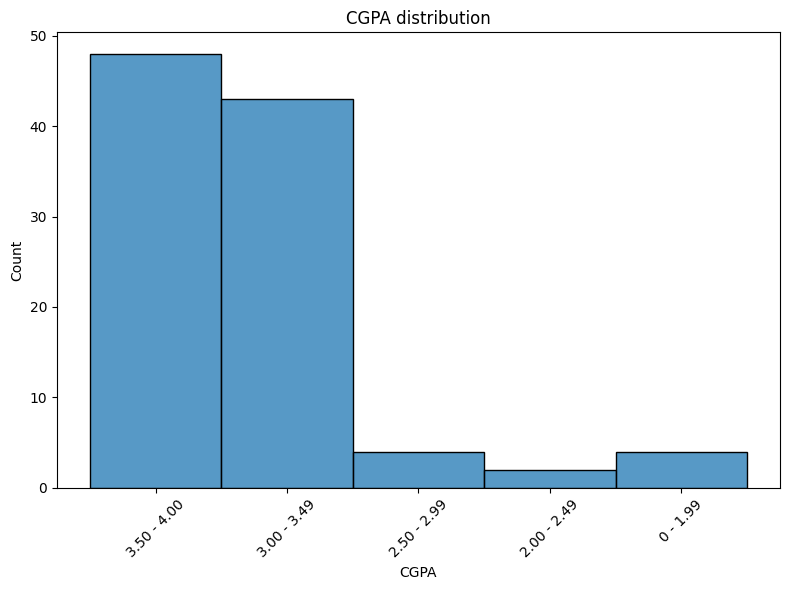

In [106]:


# Adjusting the size of the plot
plt.figure(figsize=(8, 6))
sns.histplot(sorted(cdata['CGPA'], reverse = True))
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.title("CGPA distribution")


plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

Exercise 2: Comparing Anxiety Levels Across Different Genders

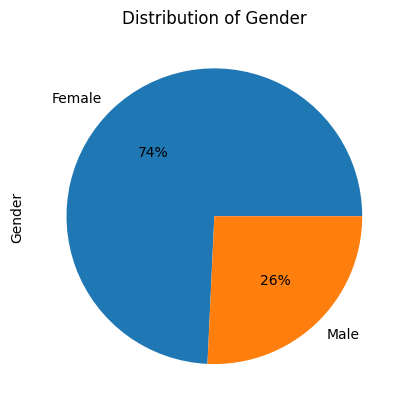

In [107]:
cdata['Gender'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Distribution of Gender')
plt.show()

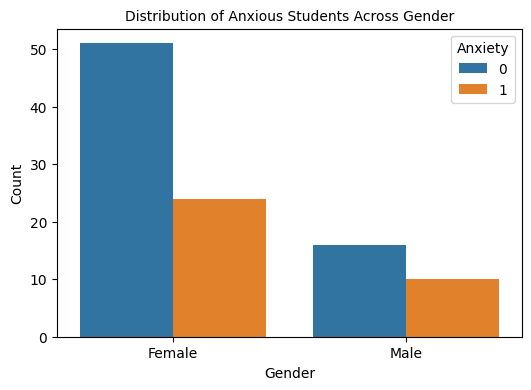

In [175]:
plt.figure(figsize=(6, 4))
sns.countplot(data=cdata, x='Gender', hue='Anxiety')
plt.title('Distribution of Anxious Students Across Gender', fontsize=10)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Exercise 3: Exploring The Relationship Between Age And Panic Attacks


In [145]:
cdata['Panic_attack_numeric'] = cdata['Panic attack'].map({'Yes': 1, 'No': 0})

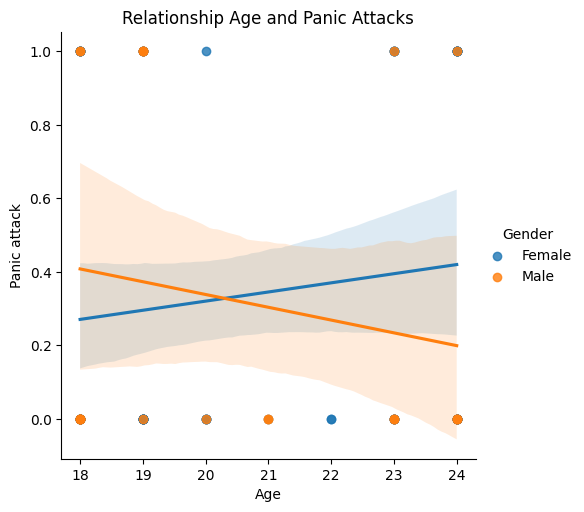

In [149]:
# Sample data
sns.lmplot(data=cdata, x='Age', y='Panic_attack_numeric', hue='Gender')

# Adding plot title and labels
plt.title('Relationship Age and Panic Attacks')
plt.xlabel('Age')
plt.ylabel('Panic attack')

# Displaying the plot
plt.show()

Exercise 4: Visualizing Pairwise Relationships With Seaborn Pair Plot


In [ ]:

cdata['Depression'] =  cdata['Depression'].replace({'Yes': 1,'No':0})
cdata['Anxiety'] =  cdata['Anxiety'].replace({'Yes': 1, 'No': 0})
cdata['Panic attack'] =  cdata['Panic attack'].replace({'Yes': 1, 'No': 0})
cdata

In [ ]:
relevant_columns = ['Age', 'CGPA', 'Depression', 'Anxiety', 'Panic attack']
subset = cdata[relevant_columns]

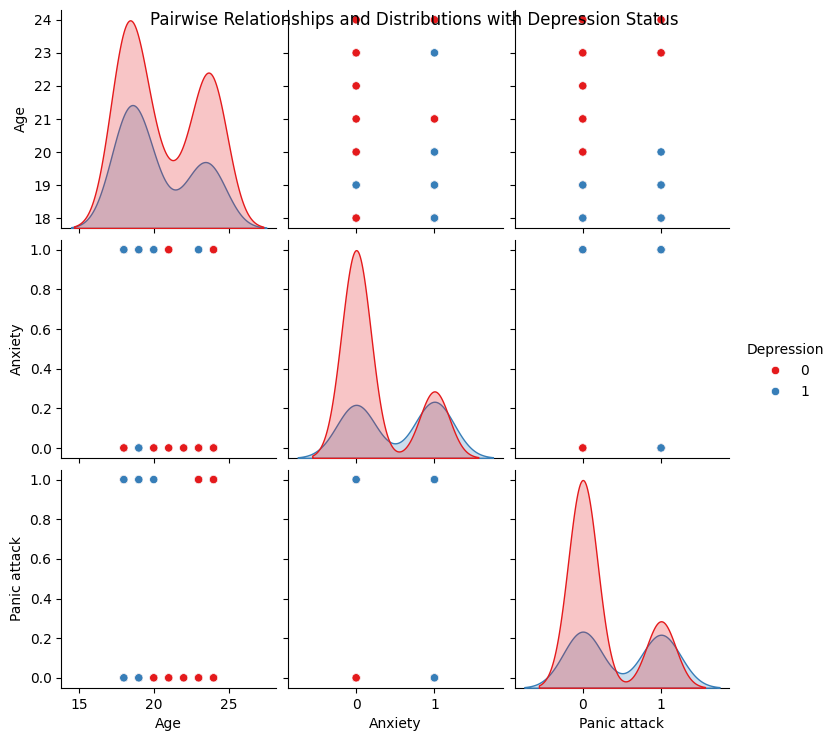

In [171]:
# Customize the plot with hue based on 'Depression' status
sns.pairplot(subset, hue='Depression', palette='Set1')

# Add a title to the plot
plt.suptitle('Pairwise Relationships and Distributions with Depression Status')

# Display the plot
plt.show()

Exercise 5: Creating A Heatmap To Visualize Correlations

<ipython-input-176-bc2633b38052>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset.corr()


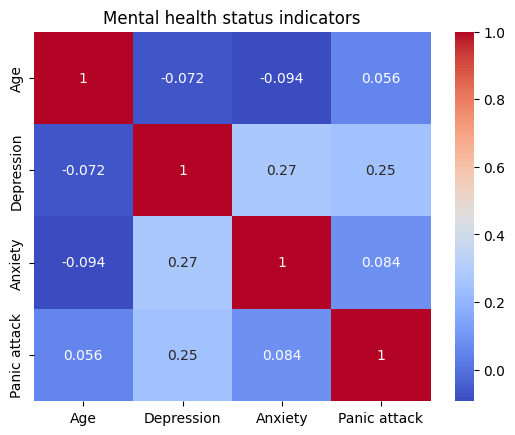

In [176]:
# Calculating the correlation matrix
correlation_matrix = subset.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mental health status indicators")
plt.show()

Exercise 6: Analyzing Distributions And Relationships Using FacetGrid

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 20.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


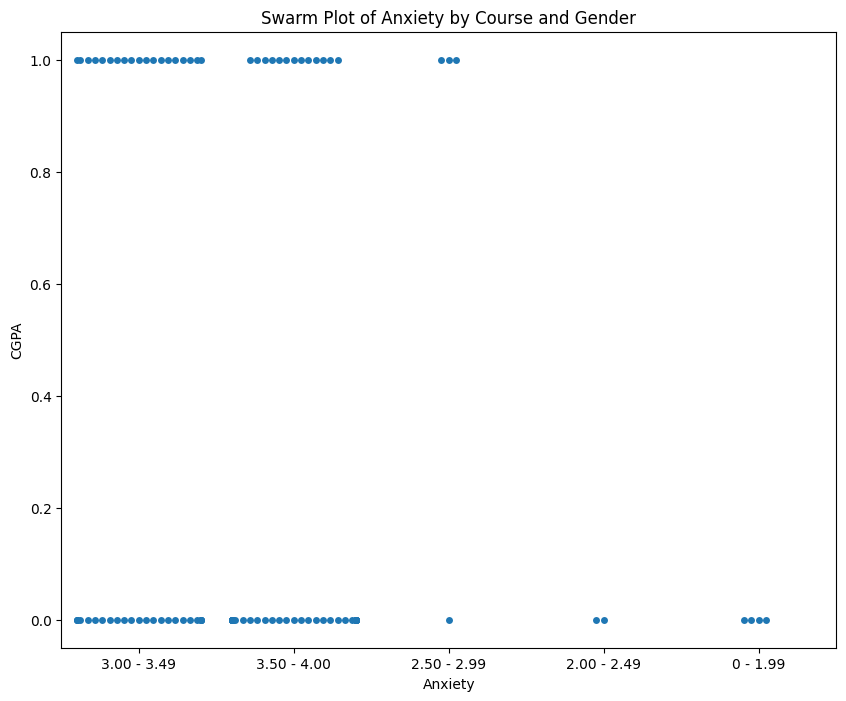

In [184]:
plt.figure(figsize=(10, 8))
sns.swarmplot(data=subset, x='CGPA', y='Depression')
plt.title('Swarm Plot of Anxiety by Course and Gender')
plt.xlabel('Anxiety')
plt.ylabel('CGPA')
plt.show()

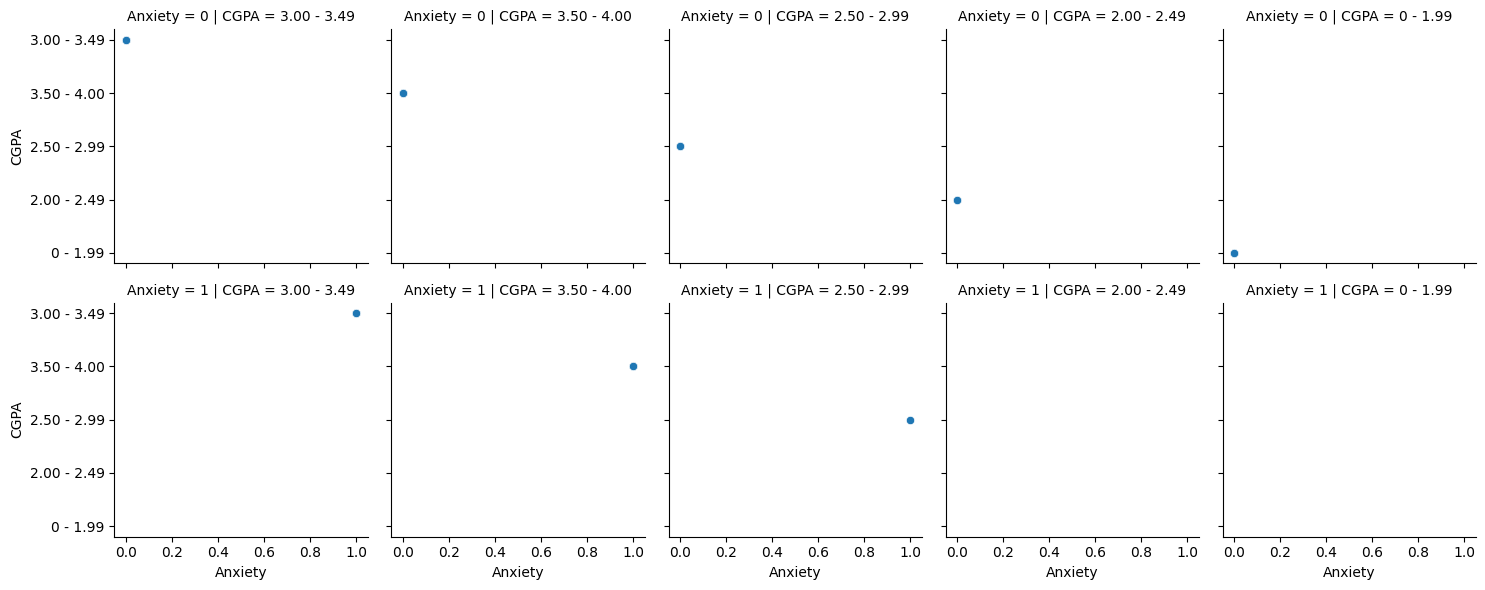

In [189]:
# Create a facet grid
g = sns.FacetGrid(subset, col="CGPA", row="Anxiety")
g.map(sns.scatterplot, "Anxiety", "CGPA")

plt.show()

<Figure size 800x500 with 0 Axes>

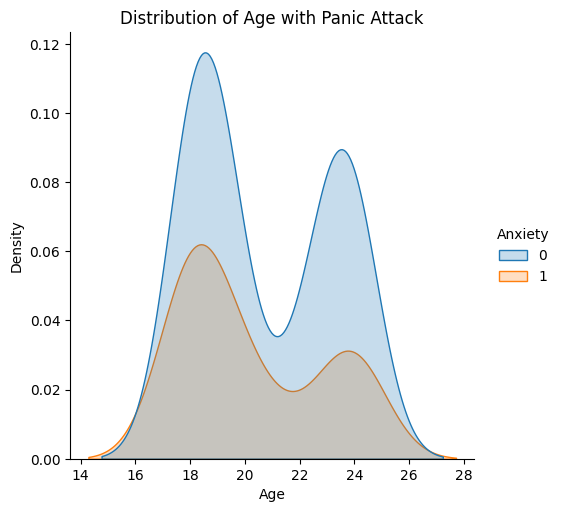

In [191]:


plt.figure(figsize=(8, 5))
sns.displot(data=subset, x='Age', hue='Anxiety', kind='kde', fill=True)
plt.title('Distribution of Age with Panic Attack', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()